In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
def spearman_correlation(df):
    corr = df[['sim_score','human_score']].corr(method='spearman').loc['human_score','sim_score']    
#     print('correlation')
    return corr
    


In [11]:
path = '/Users/sasha/Box/startup/Development/Architecture/Angie/evaluation/'
use_result_file_path = f'{path}/STS2_USE-v1.0.xlsx'
bert_result_file_path = f'{path}/STS2_BERT-v1.0.xlsx'

df_use = pd.read_excel(use_result_file_path)
df_bert = pd.read_excel(bert_result_file_path)

df_use_non_random = df_use[df_use['is_random']==False]
df_use_non_random.drop(columns=['is_random'],inplace=True)
df_bert_non_random = df_bert[df_bert['is_random']==False]
df_bert_non_random.drop(columns=['is_random'],inplace=True)

/usr/local/opt/pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
# df_use.loc[df_use.score == 0, 'score'] = -1
# df_bert.loc[df_bert.score == 0, 'score'] = -1

In [13]:
print('USE data summary')
df_use[['intent','is_random','query']].pivot_table(index=['intent'], aggfunc='count', columns=['is_random']) 

USE data summary


query      
is_random                  False True 
intent                                
Compare                       10    10
Complementary                 10    10
Customer Support              10    10
New facecare regimen          10    10
Order Information             10    10
Product Aspect Information    10    10
Product not found             10    10
Shop new arrivals             10    10
help                          10    10
out of stock                  10    10

In [14]:
print('BERT data summary')
df_bert[['intent','is_random','query']].pivot_table(index=['intent'], aggfunc='count', columns=['is_random'])

BERT data summary


query      
is_random                  False True 
intent                                
Compare                       10    10
Complementary                 10    10
Customer Support              10    10
New facecare regimen          10    10
Order Information             10    10
Product Aspect Information    10    10
Product not found             10    10
Shop new arrivals             10    10
help                          10    10
out of stock                  10    10

In [15]:
df_use['human_score'] = np.interp(df_use['score'].values, (df_use['score'].values.min(), df_use['score'].values.max()), (-1, +1))
df_bert['human_score'] = np.interp(df_bert['score'].values, (df_bert['score'].values.min(), df_bert['score'].values.max()), (-1, +1))

In [16]:
df_use.head()

,is_random,intent,query,sim_score,text,score,human_score
0,False,Customer Support,"Hi, for some reason I'm unable to connect to t...",0.304996,Hi! I just sent an email with my contact numbe...,2,0.333333
1,False,Customer Support,"Hi, for some reason I'm unable to connect to t...",0.361868,Hello! I signed up and now my profile says acc...,1,-0.333333
2,True,Customer Support,"Hi, for some reason I'm unable to connect to t...",-0.368616,Ethnic,0,-1.000000
3,False,Customer Support,"Hi, for some reason I'm unable to connect to t...",0.294685,i cannot seem to pull up the chat page to tal...,3,1.000000
4,True,Customer Support,"Hi, for some reason I'm unable to connect to t...",-0.445060,no,0,-1.000000


In [17]:
df_bert.head()

,is_random,intent,query,sim_score,text,score,human_score
0,False,Customer Support,"Hi, for some reason I'm unable to connect to t...",0.466142,"Hi Lisa, I am trying to download the voucher ...",1,-0.333333
1,True,Customer Support,"Hi, for some reason I'm unable to connect to t...",-0.019098,yes,0,-1.000000
2,False,Customer Support,"Hi, for some reason I'm unable to connect to t...",0.478346,"Hi, I’m looking for your superfine eyebrow pen...",0,-1.000000
3,True,Customer Support,"Hi, for some reason I'm unable to connect to t...",0.017551,thanks,0,-1.000000
4,True,Customer Support,"Hi, for some reason I'm unable to connect to t...",-0.021027,show more,0,-1.000000


/usr/local/opt/pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'BERT')

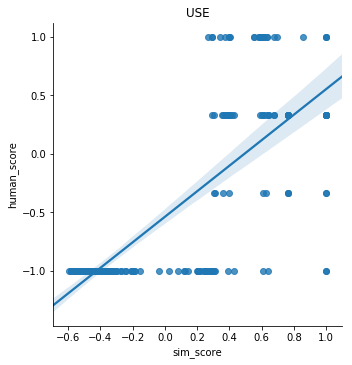

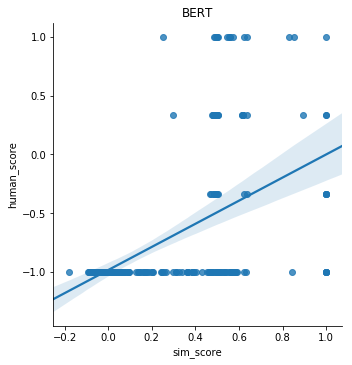

In [18]:
sns.lmplot(y='human_score', x='sim_score', data=df_use); plt.gca().set_title("USE")
sns.lmplot(y='human_score', x='sim_score', data=df_bert); plt.gca().set_title("BERT")

/usr/local/opt/pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'BERT - non random')

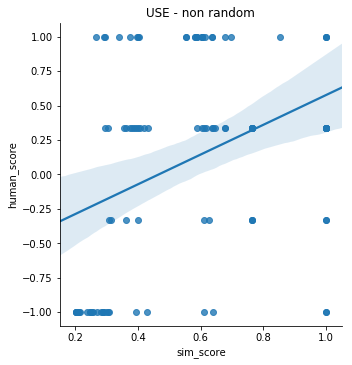

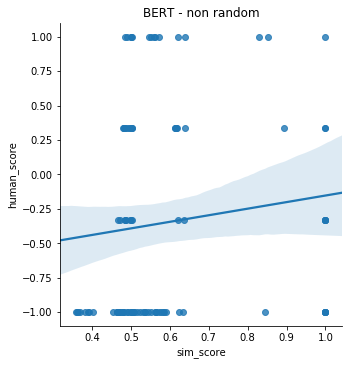

In [20]:
sns.lmplot(y='human_score', x='sim_score', data=df_use[df_use['is_random']==False]); plt.gca().set_title("USE - non random")
sns.lmplot(y='human_score', x='sim_score', data=df_bert[df_bert['is_random']==False]); plt.gca().set_title("BERT - non random")

/usr/local/opt/pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'BERT - random')

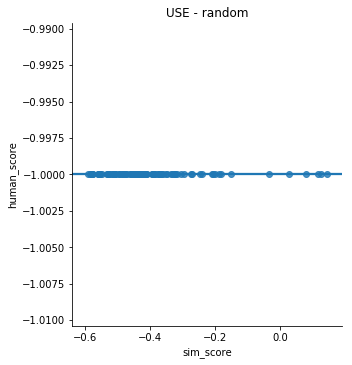

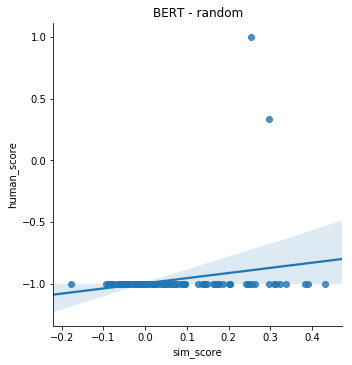

In [21]:
sns.lmplot(y='human_score', x='sim_score', data=df_use[df_use['is_random']==True]); plt.gca().set_title("USE - random")
sns.lmplot(y='human_score', x='sim_score', data=df_bert[df_bert['is_random']==True]); plt.gca().set_title("BERT - random")

In [22]:
print('use - spearman correlation - non random')
print(spearman_correlation(df_use[df_use['is_random']==False]))
print()
print('bert - spearman correlation - non random')
print(spearman_correlation(df_bert[df_bert['is_random']==False]))

use - spearman correlation - non random
0.36843561967449523

bert - spearman correlation - non random
0.22248224743218115


In [24]:
print('use - spearman correlation - random')
print(spearman_correlation(df_use[df_use['is_random']==True]))
print()
print('bert - spearman correlation - random')
print(spearman_correlation(df_bert[df_bert['is_random']==True]))

use - spearman correlation - random
nan

bert - spearman correlation - random
0.19787482575518056


In [25]:
print('use - spearman correlation all')
print(spearman_correlation(df_use))
print()
print('bert - spearman correlation all')
print(spearman_correlation(df_bert))

use - spearman correlation all
0.7564131373367496

bert - spearman correlation all
0.5403333207074442


In [27]:
print("USE")
df_use_corr_by_intent = pd.DataFrame(df_use.groupby(by='intent').apply(lambda df: spearman_correlation(df[df['is_random']==False])))
df_use_corr_by_intent.style.background_gradient(cmap='summer')\
                        .format("{:.2%}") \
                        .set_properties(**{'color': 'black', 'font-weight': 'bold'})
# df_use_corr_by_intent[0]

USE


/usr/local/opt/pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,0
intent,
Compare,-98.60%
Complementary,-27.76%
Customer Support,17.51%
New facecare regimen,-62.66%
Order Information,-5.92%
Product Aspect Information,nan%
Product not found,-35.14%
Shop new arrivals,34.82%
help,-33.33%


In [28]:
print("BERT")
df_bert_corr_by_intent = pd.DataFrame(df_bert.groupby(by='intent').apply(lambda df: spearman_correlation(df[df['is_random']==False])))
df_bert_corr_by_intent.style.background_gradient(cmap='summer')\
                        .format("{:.2%}") \
                        .set_properties(**{'color': 'black', 'font-weight': 'bold'})
# df_bert_corr_by_intent

BERT


/usr/local/opt/pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,0
intent,
Compare,nan%
Complementary,-52.22%
Customer Support,25.67%
New facecare regimen,-66.63%
Order Information,37.30%
Product Aspect Information,35.52%
Product not found,9.40%
Shop new arrivals,nan%
help,-65.50%


### counts

In [29]:
def tp_at1(df):
    total = df[0]+df[1]+df[2]+df[3]
    totalTP = df[1]+df[2]+df[3]
    return totalTP/total

def tp_at2(df):
    total = df[0]+df[1]+df[2]+df[3]
    totalTP = df[2]+df[3]
    return totalTP/total


def get_stats(df, threshold=None):
    _df = df.copy()
    if threshold:
        _df = _df[_df.sim_score > threshold]        
    df_agg = _df.pivot_table(index=['intent'], aggfunc='count', columns=['score'],values=['sim_score'],fill_value=0)
    df_agg.columns = df_agg.columns.droplevel()

    df_agg['total'] = df_agg[0]+df_agg[1]+df_agg[2]+df_agg[3]
    df_agg['Pr>0'] = df_agg.apply(tp_at1, axis=1)
    df_agg['Pr>1'] = df_agg.apply(tp_at2, axis=1)
   
    return df_agg

In [30]:
df_use_non_random['is_TP@1'] = df_use_non_random.score >= 1
df_use_non_random['is_TP@2'] = df_use_non_random.score >= 2 
df_bert_non_random['is_TP@1'] = df_bert_non_random.score >= 1
df_bert_non_random['is_TP@2'] = df_use_non_random.score >= 2 
df_use_non_random.head()

/usr/local/opt/pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/opt/pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/opt/pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,intent,query,sim_score,text,score,is_TP@1,is_TP@2
0,Customer Support,"Hi, for some reason I'm unable to connect to t...",0.304996,Hi! I just sent an email with my contact numbe...,2,True,True
1,Customer Support,"Hi, for some reason I'm unable to connect to t...",0.361868,Hello! I signed up and now my profile says acc...,1,True,False
3,Customer Support,"Hi, for some reason I'm unable to connect to t...",0.294685,i cannot seem to pull up the chat page to tal...,3,True,True
5,Customer Support,"Hi, for some reason I'm unable to connect to t...",0.295286,It keeps coming back to our chat when I click...,2,True,True
7,Customer Support,"Hi, for some reason I'm unable to connect to t...",1.000000,customer care are not responding,2,True,True


In [31]:
print('USE data summary - no threshold')
get_stats(df_use_non_random)


# df_use_agg_human_score = df_use_non_random.pivot_table(index=['intent'], aggfunc='count', columns=['score'],values=['sim_score'],fill_value=0)
# df_use_agg_human_score.columns = df_use_agg_human_score.columns.droplevel()

# df_use_agg_human_score['Pr>0'] = df_use_agg_human_score.apply(tp_at1, axis=1)
# df_use_agg_human_score['Pr>1'] = df_use_agg_human_score.apply(tp_at2, axis=1)
# df_use_agg_human_score

USE data summary - no threshold


score,0,1,2,3,total,Pr>0,Pr>1
intent,,,,,,,
Compare,0,3,7,0,10,1.0,0.7
Complementary,4,2,4,0,10,0.6,0.4
Customer Support,2,3,3,2,10,0.8,0.5
New facecare regimen,0,0,2,8,10,1.0,1.0
Order Information,1,1,3,5,10,0.9,0.8
Product Aspect Information,10,0,0,0,10,0.0,0.0
Product not found,1,0,8,1,10,0.9,0.9
Shop new arrivals,8,0,0,2,10,0.2,0.2
help,0,2,4,4,10,1.0,0.8


In [33]:
print('BERT data summary - no threshold')
get_stats(df_bert_non_random)

# df_bert_agg_human_score = df_bert_non_random.pivot_table(index=['intent'], aggfunc='count', columns=['score'],values=['sim_score'],fill_value=0)
# df_bert_agg_human_score.columns = df_bert_agg_human_score.columns.droplevel()

# df_bert_agg_human_score['Pr>0'] = df_bert_agg_human_score.apply(tp_at1, axis=1)
# df_bert_agg_human_score['Pr>1'] = df_bert_agg_human_score.apply(tp_at2, axis=1)
# df_bert_agg_human_score



BERT data summary - no threshold


score,0,1,2,3,total,Pr>0,Pr>1
intent,,,,,,,
Compare,10,0,0,0,10,0.0,0.0
Complementary,9,0,1,0,10,0.1,0.1
Customer Support,8,1,1,0,10,0.2,0.1
New facecare regimen,2,1,3,4,10,0.8,0.7
Order Information,4,1,0,5,10,0.6,0.5
Product Aspect Information,3,2,5,0,10,0.7,0.5
Product not found,4,4,1,1,10,0.6,0.2
Shop new arrivals,10,0,0,0,10,0.0,0.0
help,1,5,1,3,10,0.9,0.4


### precesion

In [47]:
threshold = 0.2
print(f'USE data summary -       threshold {threshold}')
get_stats(df_use_non_random, threshold)

USE data summary -       threshold 0.2


score,0,1,2,3,total,Pr>0,Pr>1
intent,,,,,,,
Compare,0,3,7,0,10,1.0,0.7
Complementary,4,2,4,0,10,0.6,0.4
Customer Support,2,3,3,2,10,0.8,0.5
New facecare regimen,0,0,2,8,10,1.0,1.0
Order Information,1,1,3,5,10,0.9,0.8
Product Aspect Information,10,0,0,0,10,0.0,0.0
Product not found,1,0,8,1,10,0.9,0.9
Shop new arrivals,8,0,0,2,10,0.2,0.2
help,0,2,4,4,10,1.0,0.8


In [59]:
threshold = 0.25
print(f'USE data summary -       threshold {threshold}')
get_stats(df_use_non_random, threshold)

USE data summary -       threshold 0.24


score,0,1,2,3,total,Pr>0,Pr>1
intent,,,,,,,
Compare,0,3,7,0,10,1.00,0.70
Complementary,4,2,4,0,10,0.60,0.40
Customer Support,2,3,3,2,10,0.80,0.50
New facecare regimen,0,0,2,8,10,1.00,1.00
Order Information,1,1,3,5,10,0.90,0.80
Product Aspect Information,4,0,0,0,4,0.00,0.00
Product not found,1,0,8,1,10,0.90,0.90
Shop new arrivals,6,0,0,2,8,0.25,0.25
help,0,2,4,4,10,1.00,0.80


In [49]:
threshold = 0.3
print(f'USE data summary -      threshold {threshold}')
get_stats(df_use_non_random, threshold)

USE data summary -      threshold 0.3


score,0,1,2,3,total,Pr>0,Pr>1
intent,,,,,,,
Compare,0,3,7,0,10,1.000000,0.700000
Complementary,4,2,4,0,10,0.600000,0.400000
Customer Support,1,3,2,1,7,0.857143,0.428571
New facecare regimen,0,0,2,8,10,1.000000,1.000000
Order Information,1,1,3,5,10,0.900000,0.800000
Product Aspect Information,1,0,0,0,1,0.000000,0.000000
Product not found,1,0,8,1,10,0.900000,0.900000
help,0,2,4,4,10,1.000000,0.800000
out of stock,0,0,5,5,10,1.000000,1.000000


In [37]:
threshold = 0.4
print(f'BERT data summary -      threshold {threshold}')
get_stats(df_bert_non_random, threshold)

BERT data summary -      threshold 0.4


score,0,1,2,3,total,Pr>0,Pr>1
intent,,,,,,,
Compare,10,0,0,0,10,0.0,0.0
Complementary,9,0,1,0,10,0.1,0.1
Customer Support,8,1,1,0,10,0.2,0.1
New facecare regimen,2,1,3,4,10,0.8,0.7
Order Information,4,1,0,5,10,0.6,0.5
Product Aspect Information,3,2,5,0,10,0.7,0.5
Product not found,4,4,1,1,10,0.6,0.2
Shop new arrivals,3,0,0,0,3,0.0,0.0
help,1,5,1,3,10,0.9,0.4


In [64]:
threshold = 0.45
print(f'BERT data summary -      threshold {threshold}')
get_stats(df_bert_non_random, threshold)

BERT data summary -      threshold 0.45


score,0,1,2,3,total,Pr>0,Pr>1
intent,,,,,,,
Compare,10,0,0,0,10,0.0,0.0
Complementary,9,0,1,0,10,0.1,0.1
Customer Support,8,1,1,0,10,0.2,0.1
New facecare regimen,2,1,3,4,10,0.8,0.7
Order Information,4,1,0,5,10,0.6,0.5
Product Aspect Information,3,2,5,0,10,0.7,0.5
Product not found,4,4,1,1,10,0.6,0.2
Shop new arrivals,2,0,0,0,2,0.0,0.0
help,1,5,1,3,10,0.9,0.4


In [39]:
threshold = 0.6
print(f'BERT data summary -      threshold {threshold}')
get_stats(df_bert_non_random, threshold)

BERT data summary -      threshold 0.6


score,0,1,2,3,total,Pr>0,Pr>1
intent,,,,,,,
Compare,2,0,0,0,2,0.0,0.0
Complementary,2,0,0,0,2,0.0,0.0
Customer Support,1,0,0,0,1,0.0,0.0
New facecare regimen,1,0,0,0,1,0.0,0.0
Order Information,0,1,0,0,1,1.0,0.0
Product Aspect Information,0,0,1,0,1,1.0,1.0
Product not found,1,0,0,0,1,0.0,0.0
Shop new arrivals,1,0,0,0,1,0.0,0.0
help,1,5,1,3,10,0.9,0.4
